In [90]:

##########################################################
#  Python script template for Question 3 (IAML Level 10)
#  Note that:
#  - You should not change the filename of this file, 'iaml01cw2_q3.py', which is the file name you should use when you submit your code for this question.
#  - You should define the functions shown below in your code.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define helper functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission
##########################################################

#--- Code for loading the data set and pre-processing --->
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.insert(0, os.path.abspath('../helpers'))
from iaml01cw2_helpers import *

#Load the data:
dataPath = os.path.join(os.getcwd(),'../data')
Xtrn, Ytrn, Xtst, Ytst = load_CoVoST2(dataPath)

from numpy import loadtxt
languages = loadtxt("../data/languages.txt", dtype="str",delimiter="\n", unpack=False)
#<----

# Q3.1
def iaml01cw2_q3_1():
    from sklearn.cluster import KMeans
    import math
    
    km = KMeans(n_clusters=22, random_state =1)
    km.fit(Xtrn)
    centers = km.cluster_centers_
    
    sumSquaredDists = 0
    
    for row in range(Xtrn.shape[0]):
        cluster = km.labels_[row]
        dist = math.sqrt(sum((centers[cluster] - Xtrn[row,:])**2))
        sumSquaredDists += dist**2
        
    print("Sum of squared distances (Euclidean) of samples to their closest cluster center:")
    print(sumSquaredDists)
    print()
    
    frequencies = np.zeros(22)
    for l in km.labels_:
        frequencies[l] += 1
        
    print("Number of samples for each cluster:")
    for i in range(22):
        print("Cluster " + str(i+1) + " = " + str(int(frequencies[i])))
        
#
# iaml01cw2_q3_1()   # comment this out when you run the function

# Q3.2
def iaml01cw2_q3_2():
    from sklearn.cluster import KMeans
    import math
    
    print("starting...")
    print()

    frequencies = np.zeros(22)
    means = np.zeros((22,26))
    
    for row in range(Xtrn.shape[0]):
        label = Ytrn[row]
        frequencies[label] += 1
        means[label,:] += Xtrn[row,:]
        
    for i in range(22):
        means[i,:] = means[i,:]/frequencies[i]
    
#
# iaml01cw2_q3_2()   # comment this out when you run the function

# Q3.3
def iaml01cw2_q3_3():
    import scipy.cluster.hierarchy as hierarchy
    import math
    
    print("starting...")
    print()

    frequencies = np.zeros(22)
    means = np.zeros((22,26))
    
    for row in range(Xtrn.shape[0]):
        label = Ytrn[row]
        frequencies[label] += 1
        means[label,:] += Xtrn[row,:]
        
    for i in range(22):
        means[i,:] = means[i,:]/frequencies[i]
        
    z = hierarchy.linkage(means,method="ward")
    hierarchy.dendrogram(z,orientation="right", labels=languages)
#
# iaml01cw2_q3_3()   # comment this out when you run the function

# Q3.4
def iaml01cw2_q3_4():
    from sklearn.cluster import KMeans
    import scipy.cluster.hierarchy as hierarchy
    
    print("starting...")
    print()
    
    #Array to store the indexes of every instance that belongs to each class
    dataIndexes = []
    for l in range(22):
        dataIndexes.append([])
    
    #Iterates through training set and stores indexes in array
    for row in range(Xtrn.shape[0]):
        lang = Ytrn[row]
        dataIndexes[lang] += [row]
    
    
    #Kmeans initialisation
    km = KMeans(n_clusters=3,random_state=1)
    #Stores the 3 cluster centers for all 22 classes
    centers = np.empty((66,26))
    labels = []
    
    #Iterates through each class
    for c in range(22):
        indexes = dataIndexes[c]
        
        classData = np.empty((len(indexes),26))
        
        for d in range(len(indexes)):
            index = indexes[d]
            classData[d,:] = Xtrn[index,:]
            
        km.fit(classData)
        
        classCenters = km.cluster_centers_
        centers[c*3,:] = classCenters[0,:]
        centers[(c*3)+1,:] = classCenters[1,:]
        centers[(c*3)+2,:] = classCenters[2,:]
        
        labels.append("l" + str(c) + ": c1")
        labels.append("l" + str(c) + ": c2")
        labels.append("l" + str(c) + ": c3")
    
    methods = ["ward","single","complete"]
    for m in methods:
        z = hierarchy.linkage(centers,method=m)
        hierarchy.dendrogram(z,labels=labels,leaf_font_size=6)
    
#
# iaml01cw2_q3_4()   # comment this out when you run the function

# Q3.5
#def iaml01cw2_q3_5():
#
# iaml01cw2_q3_5()   # comment this out when you run the function



starting...



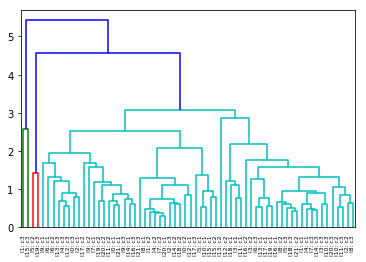

In [91]:
iaml01cw2_q3_4()